In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from bff_processor.SampleManager import SampleManager, SampleManagerPlotting
from bff_processor.SampleStack import SampleStack
from bff_processor.plotting_utils import plot_w_error_boost, boost_ratio_hist, double_list, boost2unc
from bff_processor.utils import make_view, ratio_plot_template
import matplotlib.pyplot as plt
import mplhep as hep
import pprint
import matplotlib.gridspec as gridspec
hep.set_style(hep.style.CMS)

In [2]:
sample_list =[
['data/tw_2016_BFFZprimeToMuMu_M_200.csv', 'BFFZprimeToMuMu_M_200', 'BFFZprimeToMuMu_M_200', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_200_dbs0p5.csv', 'BFFZprimeToMuMu_M_200_dbs0p5', 'BFFZprimeToMuMu_M_200_dbs0p5', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_200_dbs1p0.csv', 'BFFZprimeToMuMu_M_200_dbs1p0', 'BFFZprimeToMuMu_M_200_dbs1p0', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_350.csv', 'BFFZprimeToMuMu_M_350', 'BFFZprimeToMuMu_M_350', 'sig', 'BFFZprimeToMuMu_M_350', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_350_dbs0p5.csv', 'BFFZprimeToMuMu_M_350_dbs0p5', 'BFFZprimeToMuMu_M_350_dbs0p5', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_350_dbs1p0.csv', 'BFFZprimeToMuMu_M_350_dbs1p0', 'BFFZprimeToMuMu_M_350_dbs1p0', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_500.csv', 'BFFZprimeToMuMu_M_500', 'BFFZprimeToMuMu_M_500', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_500_dbs0p5.csv', 'BFFZprimeToMuMu_M_500_dbs0p5', 'BFFZprimeToMuMu_M_500_dbs0p5', 'sig', 'blue'],
['data/tw_2016_BFFZprimeToMuMu_M_500_dbs1p0.csv', 'BFFZprimeToMuMu_M_500_dbs1p0', 'BFFZprimeToMuMu_M_500_dbs1p0', 'sig', 'blue'],
   
['data/tw_2016_ZToEE_M_120_200.csv', 'ZToEE_M_120_200', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToEE_M_200_400.csv', 'ZToEE_M_200_400', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToEE_M_400_800.csv', 'ZToEE_M_400_800', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToEE_M_50_120.csv', 'ZToEE_M_50_120', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToEE_M_800_1400.csv', 'ZToEE_M_800_1400', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToMuMu_M_120_200.csv', 'ZToMuMu_M_120_200', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToMuMu_M_200_400.csv', 'ZToMuMu_M_200_400', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToMuMu_M_400_800.csv', 'ZToMuMu_M_400_800', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToMuMu_M_50_120.csv', 'ZToMuMu_M_50_120', 'DY', 'bkc', 'red'],
['data/tw_2016_ZToMuMu_M_800_1400.csv', 'ZToMuMu_M_800_1400', 'DY', 'bkc', 'red'],
    
['data/tw_2016_mc_santitop.csv', 'mc_santitop', 'ST', 'bkc', 'green'],
['data/tw_2016_mc_stop.csv', 'mc_stop', 'ST', 'bkc', 'green'],
['data/tw_2016_mc_ttbar.csv', 'mc_ttbar', 'TT', 'bkc', 'orange'],
['data/tw_2016_mc_ww.csv', 'mc_ww', 'WW/WZ/ZZ', 'bkc', 'purple'],
['data/tw_2016_mc_wz.csv', 'mc_wz', 'WW/WZ/ZZ', 'bkc', 'purple'],
['data/tw_2016_mc_zz.csv', 'mc_zz', 'WW/WZ/ZZ', 'bkc', 'purple']

]
sample_list_data =[
['data/tw_2016_data_el.csv', 'data_el', 'data', 'data', 'black'],
['data/tw_2016_data_mu.csv', 'data_mu', 'data', 'data', 'black'],
]

In [3]:
labels = [x[2] for x in sample_list]
labels = np.unique(labels)

In [4]:
stack = SampleStack(sample_list=sample_list)


('data/tw_2016_BFFZprimeToMuMu_M_200.csv', 'BFFZprimeToMuMu_M_200', 'BFFZprimeToMuMu_M_200', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_200_dbs0p5.csv', 'BFFZprimeToMuMu_M_200_dbs0p5', 'BFFZprimeToMuMu_M_200_dbs0p5', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_200_dbs1p0.csv', 'BFFZprimeToMuMu_M_200_dbs1p0', 'BFFZprimeToMuMu_M_200_dbs1p0', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_350.csv', 'BFFZprimeToMuMu_M_350', 'BFFZprimeToMuMu_M_350', 'sig', 'BFFZprimeToMuMu_M_350', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_350_dbs0p5.csv', 'BFFZprimeToMuMu_M_350_dbs0p5', 'BFFZprimeToMuMu_M_350_dbs0p5', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_350_dbs1p0.csv', 'BFFZprimeToMuMu_M_350_dbs1p0', 'BFFZprimeToMuMu_M_350_dbs1p0', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_500.csv', 'BFFZprimeToMuMu_M_500', 'BFFZprimeToMuMu_M_500', 'sig', 'blue')
('data/tw_2016_BFFZprimeToMuMu_M_500_dbs0p5.csv', 'BFFZprimeToMuMu_M_500_dbs0p5', 'BFFZprimeToMuMu_M_500_dbs0p5', 'sig', 'blue')

In [5]:
stack_data = SampleStack(sample_list=sample_list_data)

('data/tw_2016_data_el.csv', 'data_el', 'data', 'data', 'black')
('data/tw_2016_data_mu.csv', 'data_mu', 'data', 'data', 'black')


In [6]:
stack2 = stack.select_smp(category='bkc', clone=True)
#stack2 = stack_data.select_smp(clone=True)
stack2

[Name: ZToEE_M_120_200 
 shape: (7499, 99)
 total: 5.37e+04
 mass mean: 146.68 std: 20.98,
 Name: ZToEE_M_200_400 
 shape: (12798, 99)
 total: 1.27e+04
 mass mean: 252.85 std: 49.50,
 Name: ZToEE_M_400_800 
 shape: (16522, 99)
 total: 1.43e+03
 mass mean: 503.25 std: 98.75,
 Name: ZToEE_M_50_120 
 shape: (5788, 99)
 total: 1.44e+05
 mass mean: 93.45 std: 9.94,
 Name: ZToEE_M_800_1400 
 shape: (21228, 99)
 total: 1.23e+02
 mass mean: 958.58 std: 156.29,
 Name: ZToMuMu_M_120_200 
 shape: (5119, 99)
 total: 3.59e+04
 mass mean: 150.08 std: 22.06,
 Name: ZToMuMu_M_200_400 
 shape: (14150, 99)
 total: 1.39e+04
 mass mean: 255.75 std: 51.20,
 Name: ZToMuMu_M_400_800 
 shape: (21844, 99)
 total: 1.87e+03
 mass mean: 500.55 std: 103.51,
 Name: ZToMuMu_M_50_120 
 shape: (8735, 99)
 total: 2.12e+05
 mass mean: 92.31 std: 7.59,
 Name: ZToMuMu_M_800_1400 
 shape: (29414, 99)
 total: 1.66e+02
 mass mean: 953.88 std: 170.99,
 Name: mc_santitop 
 shape: (25132, 99)
 total: 4.35e+03
 mass mean: 208.76

In [7]:
weights = [
['Weight_PuUp','Weight_PuDown'],
['Weight_BTagUp','Weight_BTagDown'],
['Weight_PUIDUp','Weight_PUIDDown'],
['Weight_PDF_ISRFSR_Up','Weight_PDF_ISRFSR_Down'],
['Weight_MuonSFUp','Weight_MuonSFDown'],
['Weight_ElectronSFUp','Weight_ElectronSFDown'],]
regions = ['SR{}_{{}}','CR{}0_{{}}', 'CR{}3_{{}}', 'CR{}4_{{}}']
nJets = [1,2]
jes_var = [['jesDown', 'jesUp'], ['jerDown', 'jerUp']]
BFF_cuts =  ['HTLT_{}', 'RelMET_{}', 'SBM_{}']
def def_BFF_cuts(jv, nJet, bffcv):
    t1 =  [bff.format(jv) for bff in BFF_cuts]
    return(list(zip(t1,bffcv[nJet])))

BFF_cut_values ={1:[-18,.3125,18.75], 2:[-10,.2625,1.25]}
def make_view(jv,nJets, region,bffcv): 
    bff = def_BFF_cuts(jv, nJets,bffcv)
    view_dict = {'lt': {'DiLepMass': np.inf, bff[0][0]: bff[0][1], bff[1][0]: bff[1][1]},
         'gt': {'DiLepMass': -np.inf, bff[2][0]: bff[2][1]},
         'eq': { region.format(nJets).format(jv): 1},
         'eq': {'Flag_METFilters': 1, region.format(nJets).format(jv): 1}}
    return view_dict


def make_view_no_met(jv,nJets, region,bffcv): 
    bff = def_BFF_cuts(jv, nJets,bffcv)
    view_dict = {'lt': {'DiLepMass': np.inf, bff[0][0]: bff[0][1], bff[1][0]: bff[1][1]},
         'gt': {'DiLepMass': -np.inf, bff[2][0]: bff[2][1]},
         'eq': { region.format(nJets).format(jv): 1},
         'eq': { region.format(nJets).format(jv): 1}}
    return view_dict

In [8]:
column = 'DiLepMass'
bins = [int((800-105)/5+1),105,800]
bins

[140, 105, 800]

In [11]:
make_view_no_met('nominal',1,'SR{}_{{}}',BFF_cut_values)

{'lt': {'DiLepMass': inf, 'HTLT_nominal': -18, 'RelMET_nominal': 0.3125},
 'gt': {'DiLepMass': -inf, 'SBM_nominal': 18.75},
 'eq': {'SR1_nominal': 1}}

<ipython-input-10-17fa36817fa7>:18: RuntimeWarning: invalid value encountered in true_divide
  bottom.plot(dedges, rnom/rnom, color='black')
<ipython-input-10-17fa36817fa7>:19: RuntimeWarning: invalid value encountered in true_divide
  bottom.fill_between(dedges, *[runc[0]/rnom,runc[1]/rnom], color='black', alpha=.5)
<ipython-input-10-17fa36817fa7>:21: RuntimeWarning: invalid value encountered in true_divide
  bottom.plot(dedges, rnom_no_met/rnom, color='blue')
<ipython-input-10-17fa36817fa7>:22: RuntimeWarning: invalid value encountered in true_divide
  bottom.fill_between(dedges, *[runc_no_met[0]/rnom,runc_no_met[1]/rnom], color='blue', alpha=.5)
<ipython-input-10-17fa36817fa7>:18: RuntimeWarning: invalid value encountered in true_divide
  bottom.plot(dedges, rnom/rnom, color='black')
<ipython-input-10-17fa36817fa7>:19: RuntimeWarning: invalid value encountered in true_divide
  bottom.fill_between(dedges, *[runc[0]/rnom,runc[1]/rnom], color='black', alpha=.5)
<ipython-input-10-17fa36

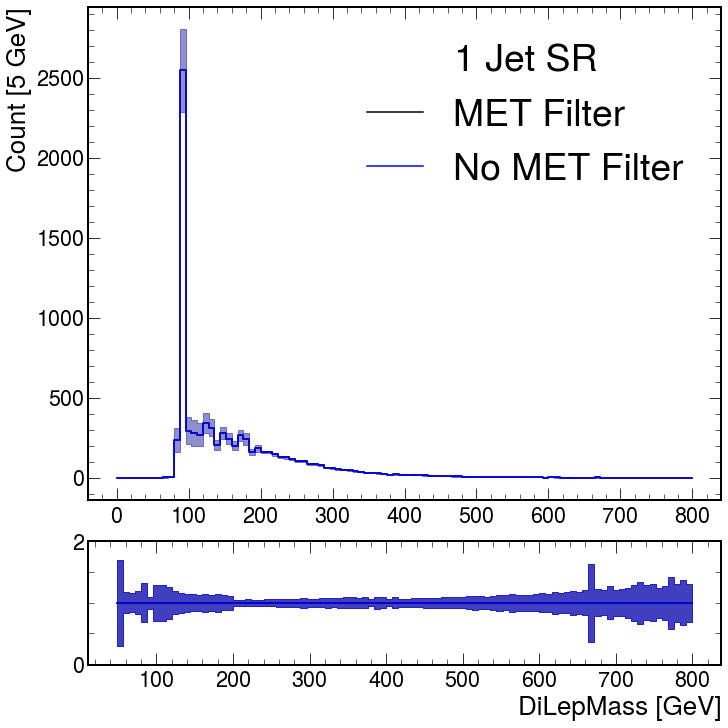

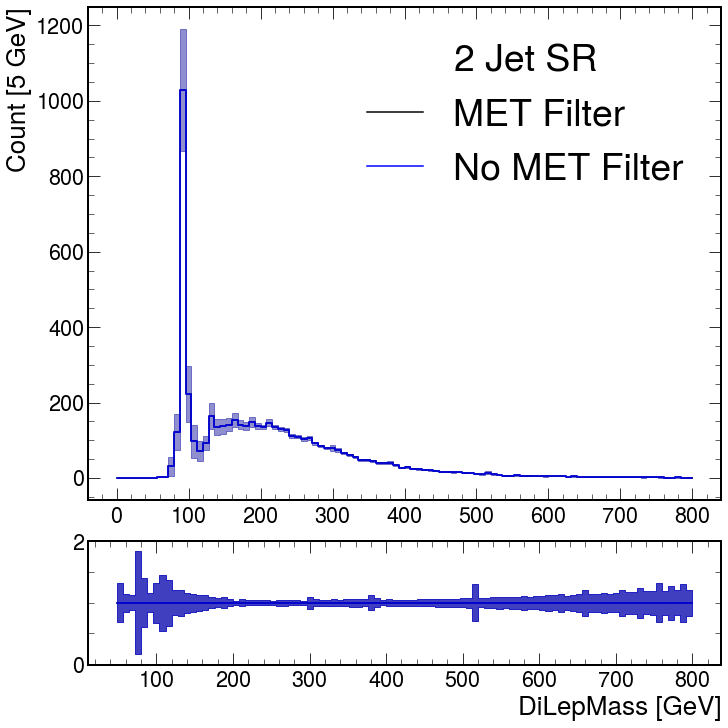

In [10]:
def plot_sig_acceptence(column,nJets, reg):
    
    fig, top, bottom = ratio_plot_template()
    #no MET values
    stack2.view = make_view('nominal',nJets,reg,BFF_cut_values)
    nom_hist = stack2.sum_boost(column, 100,0,800,  w_kwargs={'weight_names':['Weight']})
    rnom, runc = plot_w_error_boost(top, nom_hist, [0,0], color='black', alpha=.25, label="MET Filter")

    #no MET values
    stack2.view = make_view_no_met('nominal',nJets,reg,BFF_cut_values)
    nom_hist_no_met = stack2.sum_boost(column, 100,0,800,  w_kwargs={'weight_names':['Weight']})
    rnom_no_met, runc_no_met = plot_w_error_boost(top, nom_hist, [0,0], color='blue', alpha=.25, label="No MET Filter")    

    #ratio plot
    edges = nom_hist.axes[0].edges
    dedges = double_list(edges)[1:-1]
    
    bottom.plot(dedges, rnom/rnom, color='black')
    bottom.fill_between(dedges, *[runc[0]/rnom,runc[1]/rnom], color='black', alpha=.5)

    bottom.plot(dedges, rnom_no_met/rnom, color='blue')
    bottom.fill_between(dedges, *[runc_no_met[0]/rnom,runc_no_met[1]/rnom], color='blue', alpha=.5)
    bottom.set_ylim(top=2,bottom=-.01)
    
    top.set_ylabel('Count [5 GeV]')
    bottom.set_xlabel('DiLepMass [GeV]')
    top.legend(title='{} Jet SR'.format(nJets), title_fontsize='x-large', fontsize='x-large')
    #top.set_yscale('log')
    fig.savefig('output/MET_filter_comparision_{}_sig.png'.format(nJets))
plot_sig_acceptence('DiLepMass', 1,'SR{}_{{}}')
plot_sig_acceptence('DiLepMass',2,'SR{}_{{}}')

In [36]:
no_bff ={1:[np.inf,np.inf,0], 2:[np.inf,np.inf,0]}
scan_htlt = lambda x: {1:[x,np.inf,0], 2:[x,np.inf,0]}
scan_htlt_view = lambda y,x: make_view('nominal',y,'SR{}_{{}}', scan_htlt(x))

In [37]:

import boost_histogram as bh

h = bh.Histogram(
    bh.axis.Regular(100, 0, 800, metadata="DiLepMass"), bh.axis.Regular(int(800/10)+1, -800, 0, metadata="HTLT Cut Value")
)

In [38]:
def make_htlt_scan(column,nJets, h):
    nBins = len(h.axes[0].centers)
    min_max = h.axes[0].edges[0], h.axes[0].edges[-1]
    y_center = h.axes[1].centers
    stack.view = make_view('nominal',nJets,'SR{}_{{}}', no_bff)
    nom_hist = stack.sum_boost(column, nBins,*min_max,  w_kwargs={'weight_names':['Weight']})
    nom = boost2unc(nom_hist)+1e-12
    ratios = []
    for x in y_center:
        print(x)
        stack.view = scan_htlt_view(nJets,x)
        nom_hist = stack.sum_boost(column,  nBins,*min_max,  w_kwargs={'weight_names':['Weight']})
        numerator = boost2unc(nom_hist)+1e-12
        ratio = numerator/nom
        print(np.mean(ratio))
        ratio = np.array( [r.nominal_value for r in numerator/nom])
        ratios.append(ratio)
    return np.array(ratios)
ratios = make_htlt_scan('DiLepMass',1, h)

KeyboardInterrupt: 

In [69]:
ratios

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [70]:
np.shape(ratios), np.shape(h[:,:])

((81, 100), (100, 81))

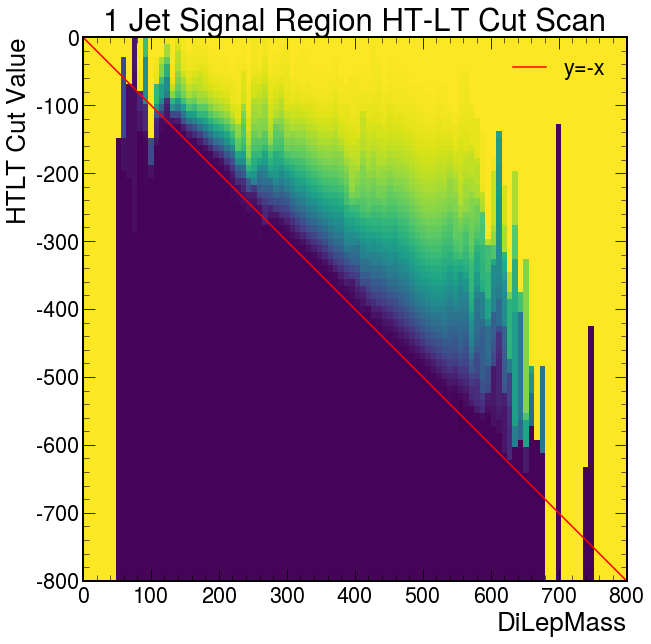

In [87]:
# Fill histogram with Numpy arrays, this is very fast
h[:,:] = np.array(ratios).T

# Get numpy.histogram compatible representation of the histogram
w, x, y = h.to_numpy()

# Draw the count matrix

fig, ax = plt.subplots()
ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata)
ax.set_ylabel(h.axes[1].metadata)
ax.set_aspect("equal")
fig.savefig('output/2016_htlt_scan_1_jet.png')
ax.set_title("1 Jet Signal Region HT-LT Cut Scan")

ax.plot([0,800],[0,-800], label="y=-x", color='red')
ax.legend()
fig.savefig('output/2016_htlt_scan_1_jet_y=-x.png')

In [88]:
ratios2 = make_htlt_scan('DiLepMass',2, h)

-795.0617283950617
19.000000079972+/-0.000000000004
-785.1851851851852
19.000000079972+/-0.000000000004
-775.3086419753087
19.000000079972+/-0.000000000004
-765.4320987654321
19.000000079972+/-0.000000000004
-755.5555555555555
19.000000079972+/-0.000000000004
-745.679012345679
19.000000079972+/-0.000000000004
-735.8024691358024
19.000000079972+/-0.000000000004
-725.925925925926
19.000000079972+/-0.000000000004
-716.0493827160494
19.000000079972+/-0.000000000004
-706.1728395061729
19.000000079972+/-0.000000000004
-696.2962962962963
19.000000079972+/-0.000000000004
-686.4197530864197
19.000000079972+/-0.000000000004
-676.5432098765432
19.000000079972+/-0.000000000004
-666.6666666666667
19.000000079972+/-0.000000000004
-656.7901234567901
19.000000079972+/-0.000000000004
-646.9135802469136
19.000000079972+/-0.000000000004
-637.0370370370371
19.000000079972+/-0.000000000004
-627.1604938271605
19.000000079972+/-0.000000000004
-617.283950617284
19.000000079972+/-0.000000000004
-607.4074074074

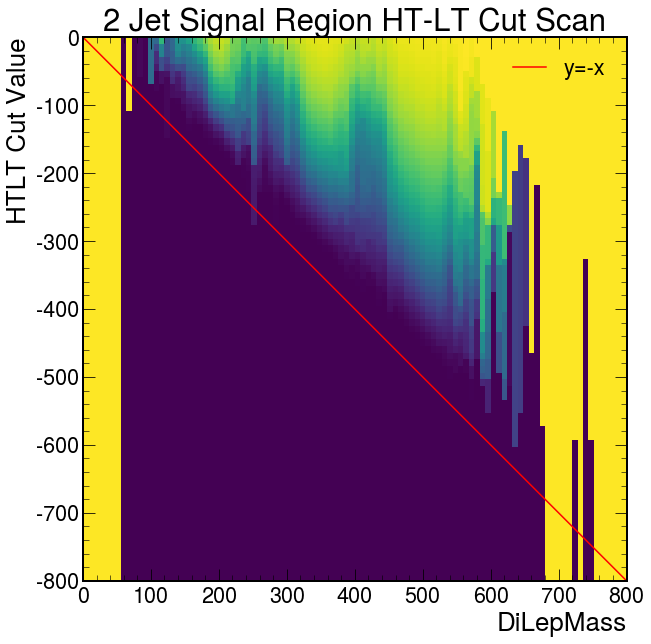

In [89]:
# Fill histogram with Numpy arrays, this is very fast
h[:,:] = np.array(ratios2).T

# Get numpy.histogram compatible representation of the histogram
w, x, y = h.to_numpy()

# Draw the count matrix

fig, ax = plt.subplots()
ax.pcolormesh(x, y, w.T)
ax.set_xlabel(h.axes[0].metadata)
ax.set_ylabel(h.axes[1].metadata)
ax.set_aspect("equal")
fig.savefig('output/2016_htlt_scan_2_jet.png')
ax.set_title("2 Jet Signal Region HT-LT Cut Scan")

ax.plot([0,800],[0,-800], label="y=-x", color='red')
ax.legend()
fig.savefig('output/2016_htlt_scan_2_jet_y=-x.png')